In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data_file = 'us_contagious_diseases.csv'

1. Wczytaj dane z pliku us_contagious_diseases.csv i zapoznaj się z nimi.

In [2]:
data = pd.read_csv(data_file)

data.shape
data.head()
data.tail()
data.describe()
data.info()
data.isna().sum() # ile jest nulli w danych kolmunach
data['disease'].value_counts()
data['state'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16065 entries, 0 to 16064
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   disease          16065 non-null  object 
 1   state            16065 non-null  object 
 2   year             16065 non-null  int64  
 3   weeks_reporting  16065 non-null  int64  
 4   count            16065 non-null  int64  
 5   population       15851 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 753.2+ KB


state
Alabama                 315
Alaska                  315
Arizona                 315
Arkansas                315
California              315
Colorado                315
Connecticut             315
Delaware                315
District Of Columbia    315
Florida                 315
Georgia                 315
Hawaii                  315
Idaho                   315
Illinois                315
Indiana                 315
Iowa                    315
Kansas                  315
Kentucky                315
Louisiana               315
Maine                   315
Maryland                315
Massachusetts           315
Michigan                315
Minnesota               315
Mississippi             315
Missouri                315
Montana                 315
Nebraska                315
Nevada                  315
New Hampshire           315
New Jersey              315
New Mexico              315
New York                315
North Carolina          315
North Dakota            315
Ohio          

2. Uwzględnij jedynie dane na temat odry (ang. measles).

In [3]:
measles_data = data.query("disease == 'Measles'")
measles_data['disease'].unique()
measles_data.head()

,disease,state,year,weeks_reporting,count,population
2346,Measles,Alabama,1928,52,8843,2589923.0
2347,Measles,Alabama,1929,49,2959,2619131.0
2348,Measles,Alabama,1930,52,4156,2646248.0
2349,Measles,Alabama,1931,49,8934,2670818.0
2350,Measles,Alabama,1932,41,270,2693027.0


Nie bierz również pod uwagę danych dotyczących stanów Alaska i Hawaje (ang. Hawaii)

In [4]:
measles_data_2 = measles_data[~measles_data['state'].isin(['Alaska', 'Hawaii'])]
measles_data_2['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District Of Columbia', 'Florida',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

3. Dodaj kolumnę zawierającą liczbę przypadków odry na 100 tys. mieszkańców. W rachunkach uwzględnij kolumnę zawierającą liczbę tygodniowych raportów (ang. weeks_reporting).

In [5]:
measles_data_2 = measles_data_2.copy()
measles_data_2['diseases_rate'] = (measles_data_2['count'] * (measles_data_2['weeks_reporting']/52)) / (measles_data_2['population']*100000.0)
measles_data_2.head()

,disease,state,year,weeks_reporting,count,population,diseases_rate
2346,Measles,Alabama,1928,52,8843,2589923.0,3.414387e-08
2347,Measles,Alabama,1929,49,2959,2619131.0,1.064585e-08
2348,Measles,Alabama,1930,52,4156,2646248.0,1.570526e-08
2349,Measles,Alabama,1931,49,8934,2670818.0,3.152059e-08
2350,Measles,Alabama,1932,41,270,2693027.0,7.905031e-10


4. Utwórz wykres liczby przypadków odry na 100 tys. mieszkańców w Kalifornii (ang. California) w poszczególnych latach. Nanieś na wykres rok opracowania szczepionki MMR.

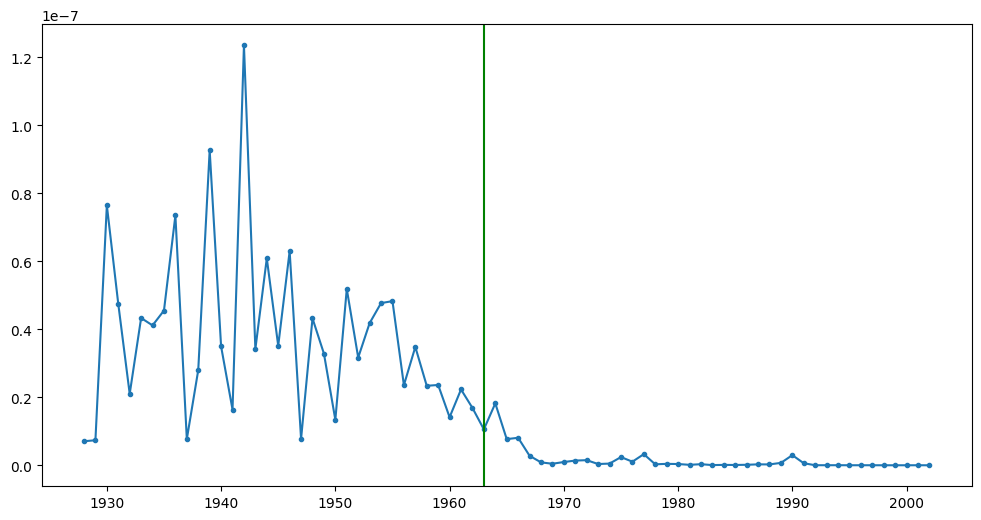

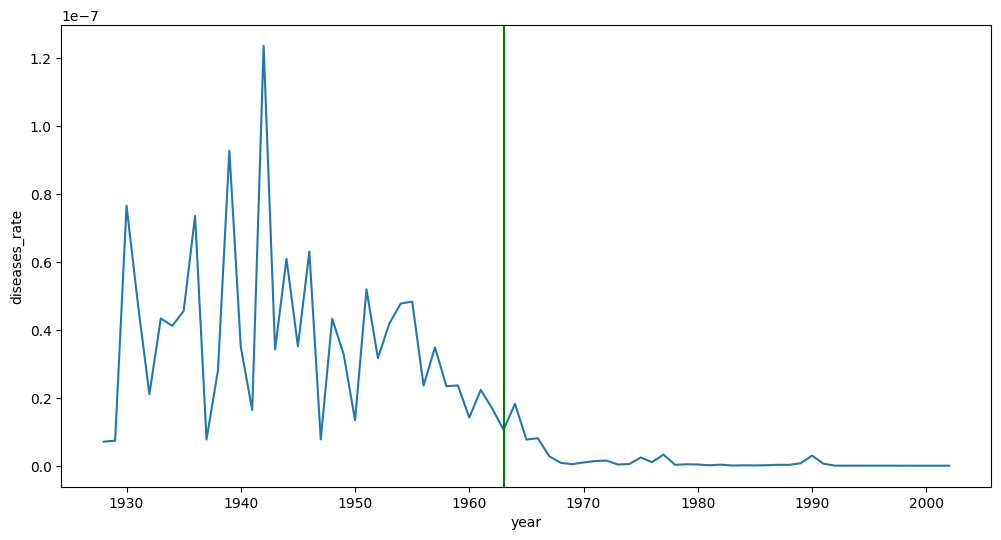

In [6]:
mmr_year = 1963 #niepelna szczepionka (pelna byla w 71)
measles_california = measles_data_2.query("state == 'California'")

plt.figure(figsize=(12,6))
plt.plot(measles_california['year'], measles_california['diseases_rate'], marker='.')
plt.axvline(x=mmr_year, color='green')
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(measles_california, x='year', y='diseases_rate')
plt.axvline(x=mmr_year, color='green')
plt.show()

5. Utwórz histogram liczby przypadków odry w roku 1950, 1960 i 1970.

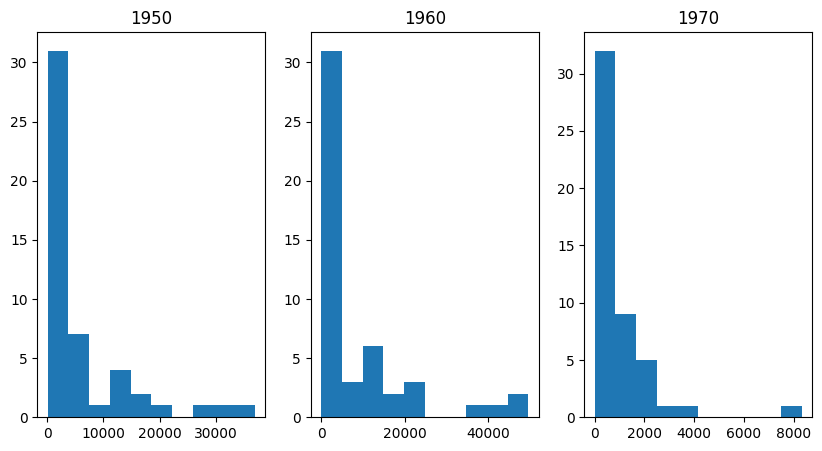

In [23]:
#MOJE ROZW
years_data = measles_data_2[measles_data_2['year'].isin([1950,1960,1970])]

plt.figure(figsize=(10, 5))

for i, year in enumerate([1950, 1960, 1970], 1):
    plt.subplot(1, 3, i)
    year_data_filtered = years_data[years_data['year'] == year]
    plt.title(year)
    plt.hist(year_data_filtered['count'])
plt.show()

6. Dodaj kolumnę zawierającą pierwiastek kwadratowy liczby przypadków odry. Zrób podobnie dla liczby przypadków odry na 100 tys. mieszkańców.

In [8]:
measles_data_2 = measles_data_2.copy()
measles_data_2['sqrt_count'] = np.sqrt(measles_data_2['count'])
measles_data_2['sqrt_diseases_rate'] = np.sqrt(measles_data_2['diseases_rate'])

7. Utwórz wykres spierwiastkowanej liczby przypadków odry na 100 tys. mieszkańców w stanie Kalifornia w poszczególnych latach. Nanieś na wykres rok opracowania szczepionki MMR.

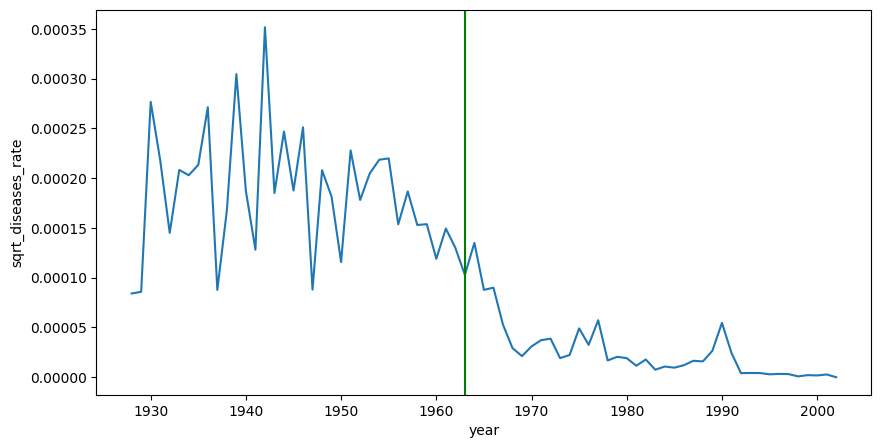

In [9]:
measles_california_2 = measles_data_2.query("state == 'California'")
plt.figure(figsize=(10,5))
sns.lineplot(data=measles_california_2, x='year', y='sqrt_diseases_rate')
plt.axvline(x=mmr_year, color='green')
plt.show()

8. Utwórz histogram spierwiastkowanej liczby przypadków odry w roku 1950, 1960 i 1970.

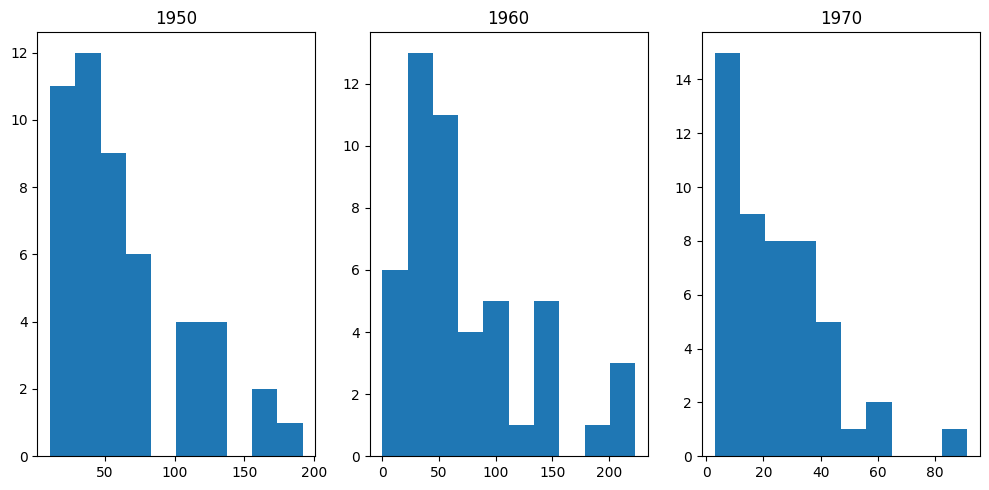

In [10]:
years_data_2 = measles_data_2[measles_data_2['year'].isin([1950,1960,1970])]
plt.figure(figsize=(10, 5))
for i, year in enumerate([1950, 1960, 1970], 1):
    plt.subplot(1, 3, i)
    year_data_filtered_2 = years_data_2[years_data_2['year'] == year]
    plt.hist(year_data_filtered_2['sqrt_count'])
    plt.title(f'{year}')
plt.tight_layout()
plt.show()

9. Utwórz wykres spierwiastkowanej liczby przypadków odry w poszczególnych stanach w roku 1950, 1960 i 1970. Czy trend spadkowy wystąpił w przypadku?

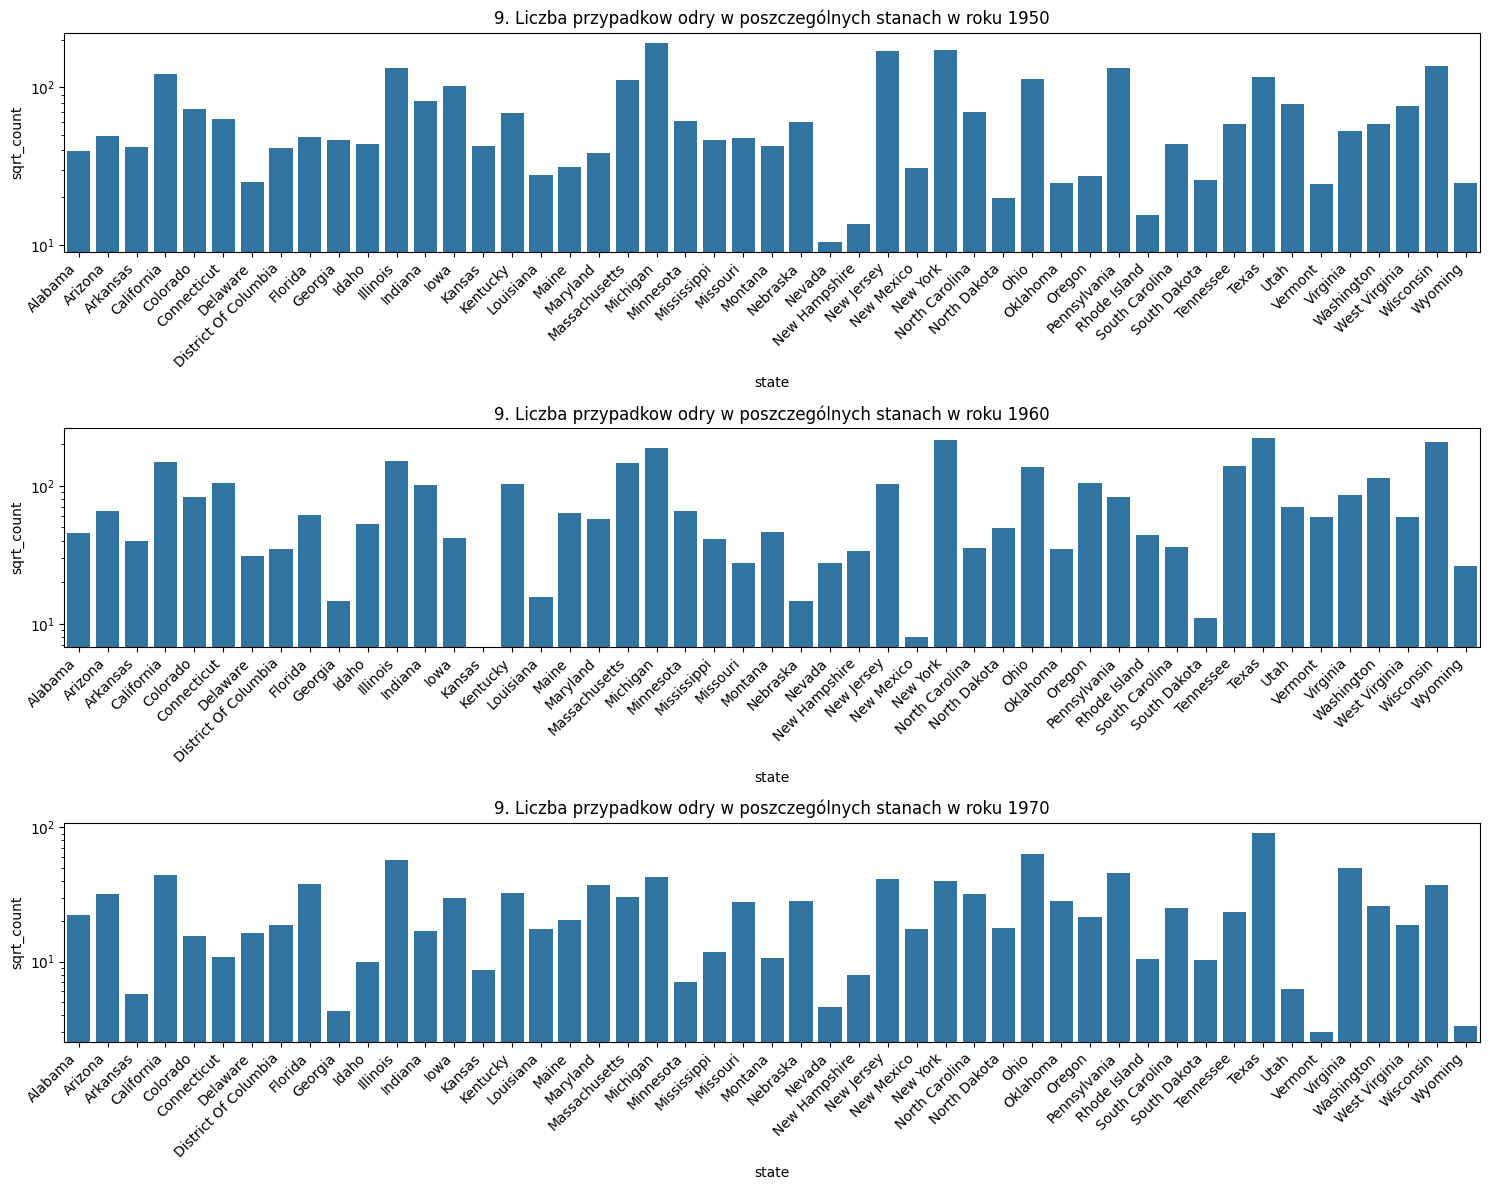

In [ ]:
plt.figure(figsize=(15, 12))
for i, year in enumerate([1950, 1960, 1970], 1):
    plt.subplot(3, 1, i)
    year_data_filtered_2 = years_data_2[years_data_2['year'] == year]
    sns.barplot(year_data_filtered_2, x='state', y='sqrt_count')
    plt.title(f'9. Liczba przypadkow odry w poszczególnych stanach w roku {year}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

9. Ale na jednym wykresie:

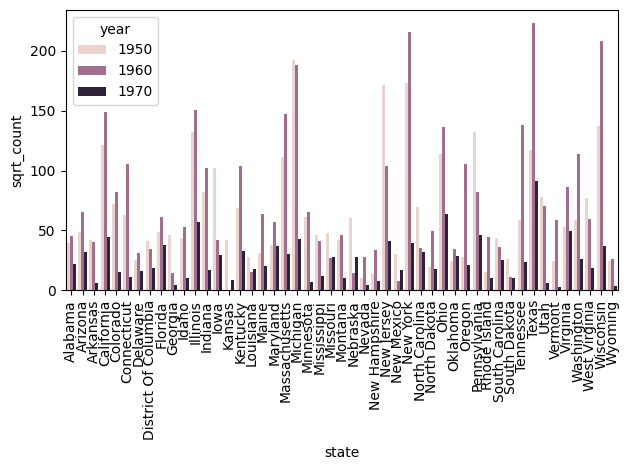

In [26]:
plt.Figure(figsize=(20,10))
sns.barplot(data=years_data_2, x="state", y="sqrt_count", hue="year")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

10. Utwórz wykres pudełkowy (skrzynkowy) spierwiastkowanej liczby przypadków odry na 100 tys. mieszkańców w poszczególnych latach.

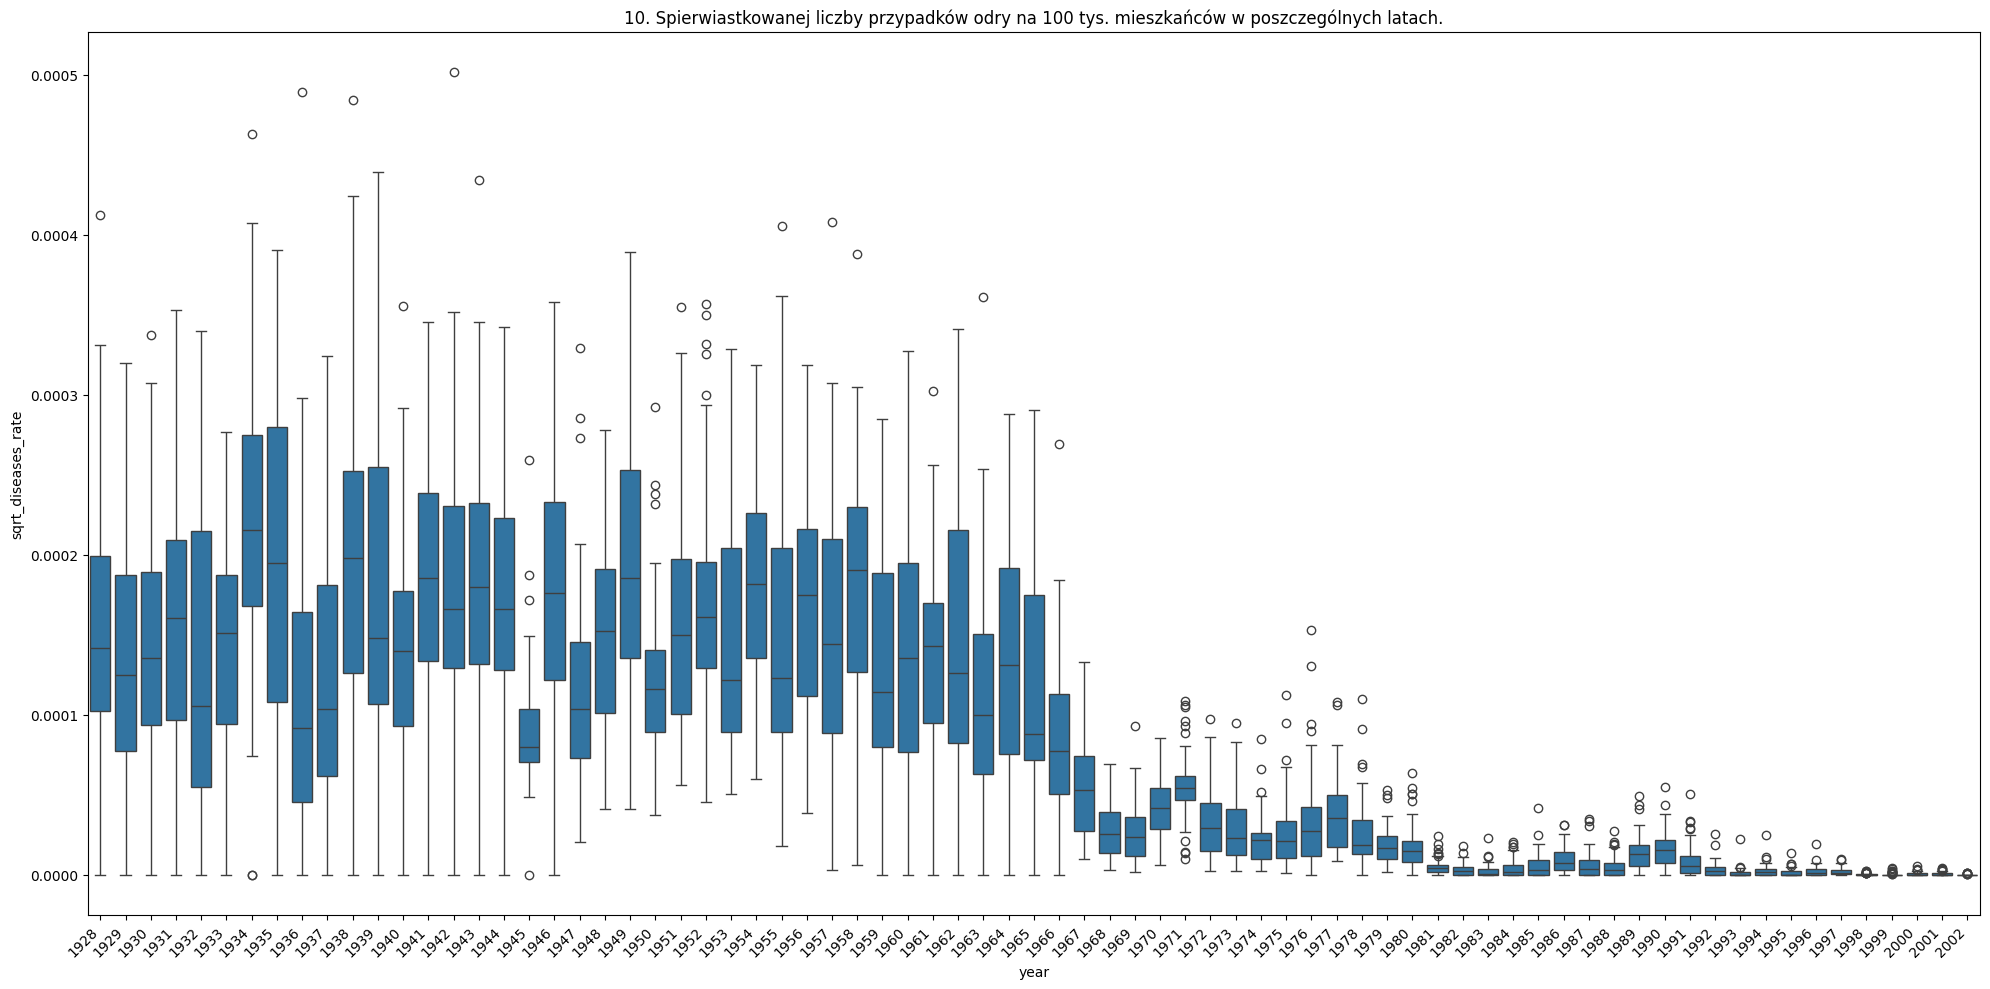

In [28]:
plt.figure(figsize=(20, 10))
sns.boxplot(measles_data_2, x='year', y='sqrt_diseases_rate')
plt.title(f'10. Spierwiastkowanej liczby przypadków odry na 100 tys. mieszkańców w poszczególnych latach.')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

11. Utwórz wykres pudełkowy (skrzynkowy) spierwiastkowanej liczby przypadków odry na 100 tys. mieszkańców w poszczególnych stanach i poszczególnych latach

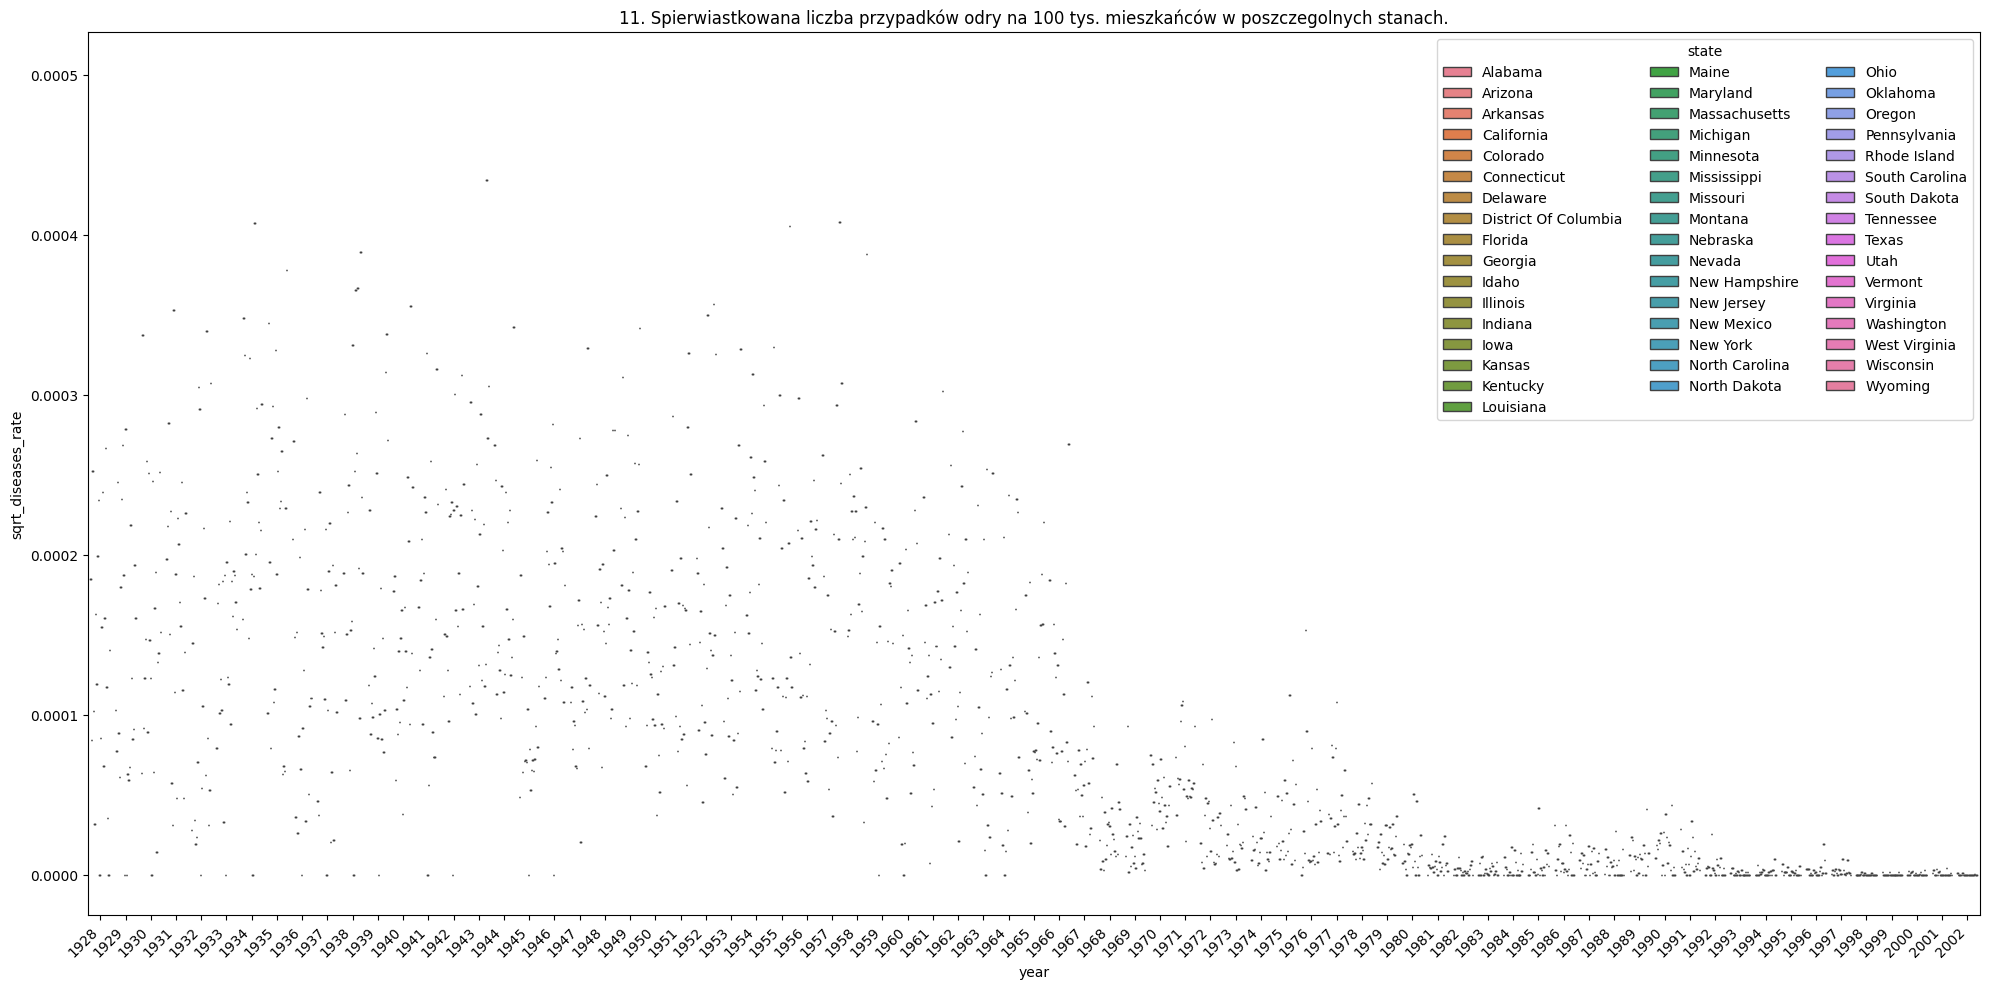

In [33]:
fig = plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=measles_data_2, x='year', y='sqrt_diseases_rate', hue='state')
ax.legend(ncols =3, title='state')
plt.title('11. Spierwiastkowana liczba przypadków odry na 100 tys. mieszkańców w poszczegolnych stanach.')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# boxplot staje sie punktami - bezsensu wykres

12. Utwórz wykres liniowy spierwiastkowanej liczby przypadków odry na 100 tys. mieszkańców w poszczególnych stanach i poszczególnych latach. Nanieś na wykres średnią dla całego kraju.

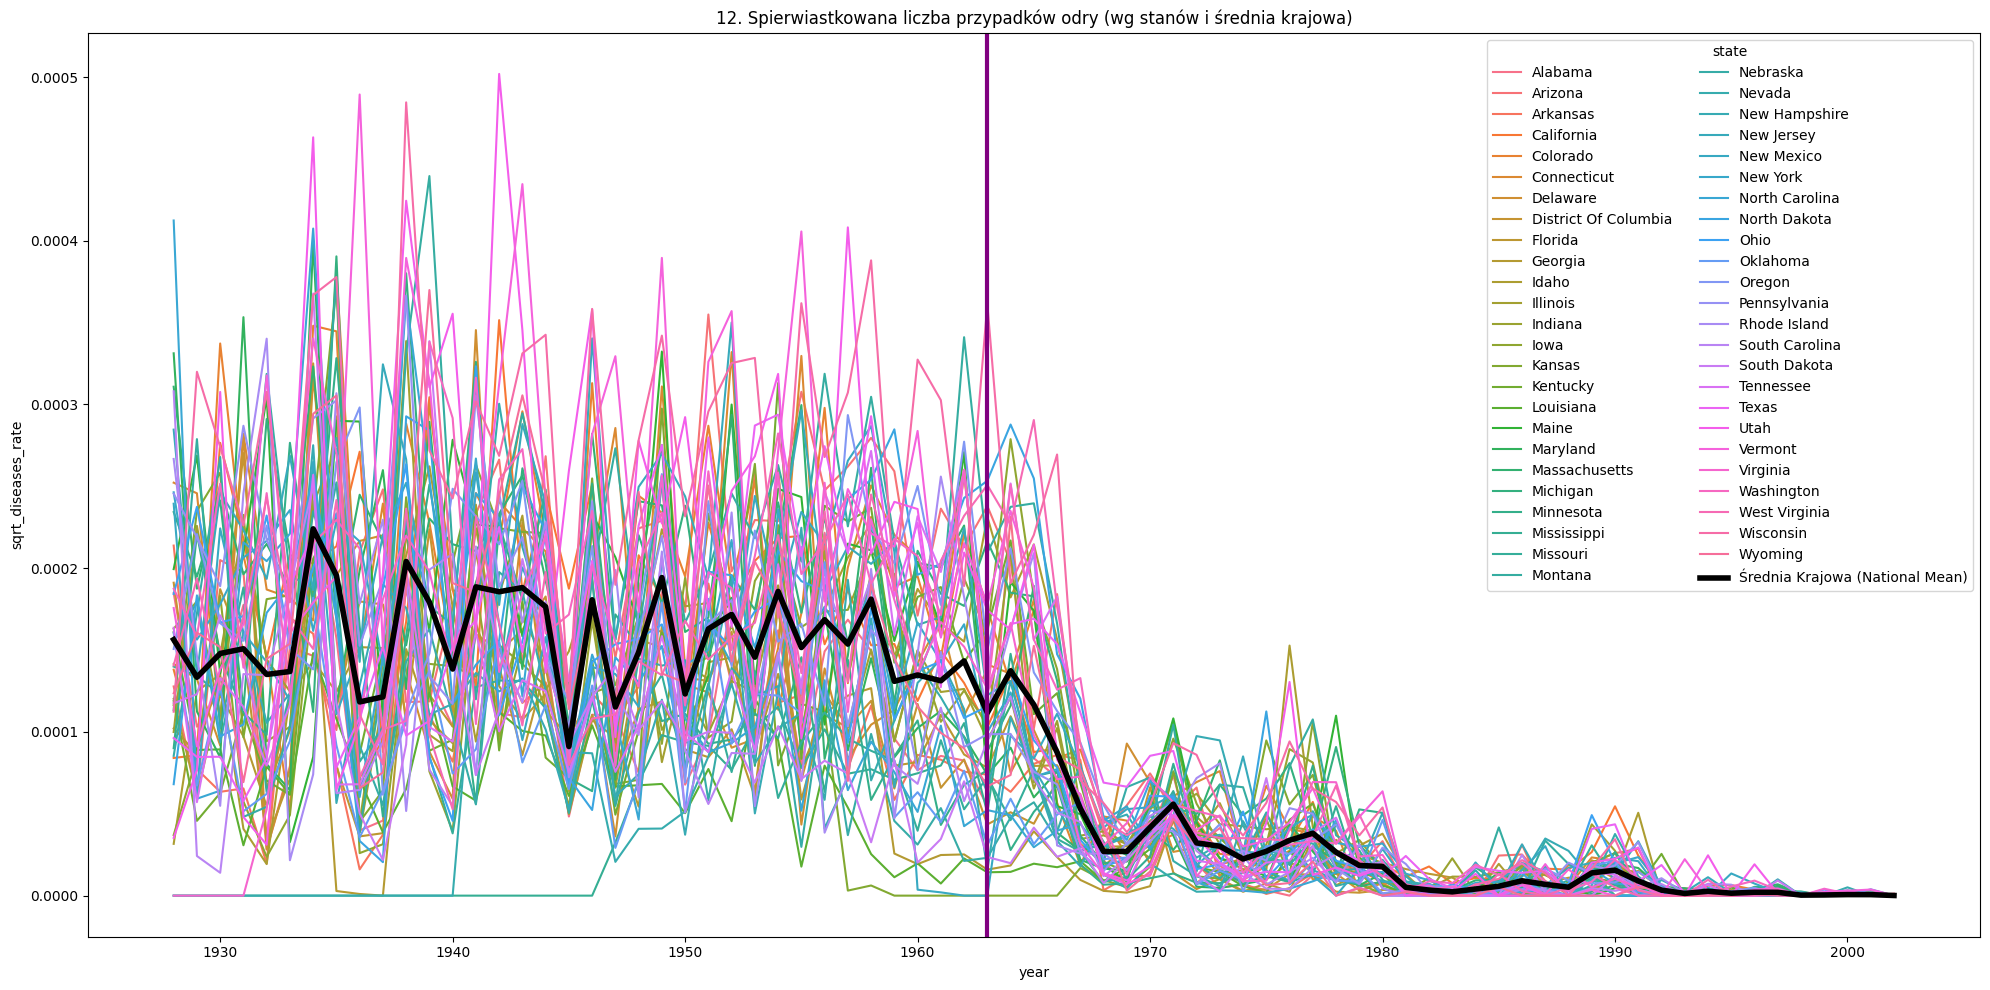

In [ ]:
national_mean = measles_data_2.groupby('year')['sqrt_diseases_rate'].mean().reset_index()
national_mean.columns = ['year', 'national_mean_sqrt_rate']

fig = plt.figure(figsize=(20, 10))
ax = sns.lineplot(data=measles_data_2, x='year', y='sqrt_diseases_rate', hue='state')
sns.lineplot(data=national_mean, x='year', y='national_mean_sqrt_rate', color='black', linewidth=4, label='Średnia Krajowa (National Mean)')
plt.axvline(x=mmr_year, color='purple', linewidth=3) # dodatkowo sb zapisalem
plt.title('12. Spierwiastkowana liczba przypadków odry (wg stanów i średnia krajowa)')
ax.legend(ncols = 2, title='state')
plt.tight_layout()
plt.show()

13. Utwórz mapę cieplną spierwiastkowanej liczby przypadków odry na 100 tys. mieszkańców w poszczególnych stanach i poszczególnych latach.

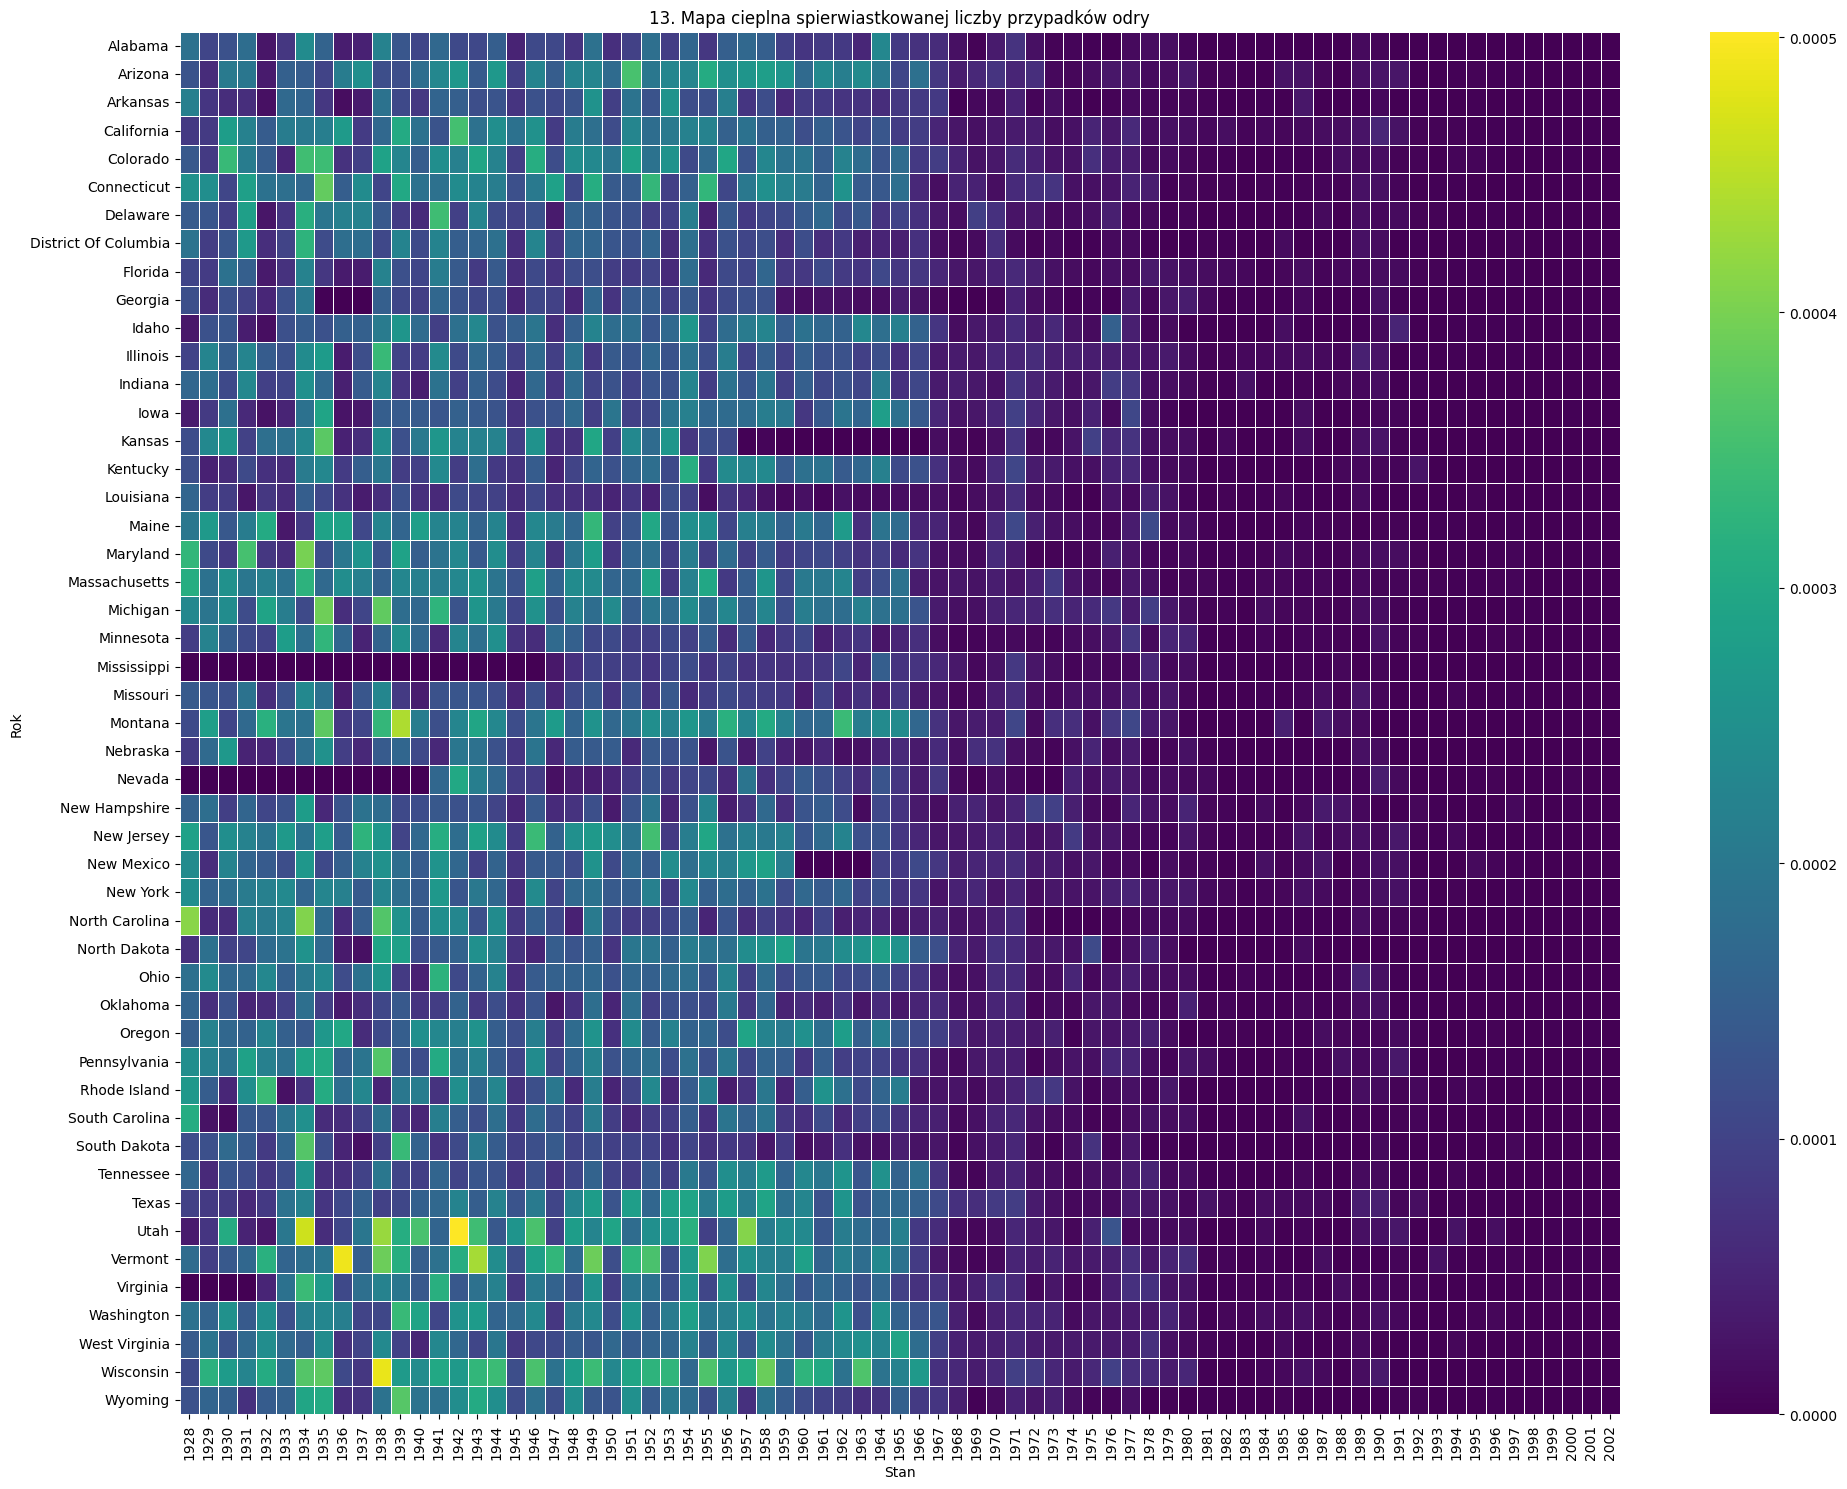

In [43]:
heatmap_data = measles_data_2.pivot_table(index='state', columns='year', values='sqrt_diseases_rate', aggfunc='mean')
plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=0.5)
plt.title('13. Mapa cieplna spierwiastkowanej liczby przypadków odry')
plt.xlabel('Stan')
plt.ylabel('Rok')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

14. Potwierdź hipotezę dotyczącą skuteczności szczepionki MMR. Nanieś krzywą regresji oraz wyznacz istotność statystyczną.

In [17]:
# :(